In [1]:
!pip install matplotlib seaborn scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

In [31]:
df = pd.read_csv("saraga_chunked_normalized_features_2.csv")
df.head(5)
import warnings
warnings.filterwarnings('ignore')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   filename     9226 non-null   object 
 1   raga         9226 non-null   object 
 2   rmse         9226 non-null   float64
 3   chroma_stft  9226 non-null   float64
 4   spec_cent    9226 non-null   float64
 5   spec_bw      9226 non-null   float64
 6   mfcc0        9226 non-null   float64
 7   mfcc1        9226 non-null   float64
 8   mfcc2        9226 non-null   float64
 9   mfcc3        9226 non-null   float64
 10  mfcc4        9226 non-null   float64
 11  mfcc5        9226 non-null   float64
 12  mfcc6        9226 non-null   float64
 13  mfcc7        9226 non-null   float64
 14  mfcc8        9226 non-null   float64
 15  mfcc9        9226 non-null   float64
 16  mfcc10       9226 non-null   float64
 17  mfcc11       9226 non-null   float64
 18  mfcc12       9226 non-null   float64
 19  mfcc13

In [33]:
df.describe()

,rmse,chroma_stft,spec_cent,spec_bw,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18
count,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,...,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000
mean,0.049678,0.283251,1672.784060,1760.092736,-282.691125,114.701963,-31.465167,23.173505,-8.381656,2.210302,...,-5.811969,-6.423939,-2.537738,-5.072332,-2.832510,-3.397614,-3.010134,-3.548555,-1.963327,-4.104468
std,0.031510,0.051047,362.536686,323.005171,78.531415,25.111276,19.287989,12.699816,11.236572,10.275822,...,6.379650,6.494254,6.190497,5.904948,6.351212,5.199529,5.829300,6.339358,5.971811,4.750927
min,0.001721,0.154003,654.759332,998.398737,-560.730830,26.335535,-100.507380,-29.778120,-53.851334,-34.393517,...,-25.412088,-34.614357,-29.190487,-22.139587,-25.553850,-26.242907,-20.649979,-29.468285,-21.132141,-21.029585
25%,0.021175,0.250157,1408.677330,1468.506027,-336.458775,97.943861,-45.101867,15.048194,-14.984956,-4.258319,...,-9.824822,-10.662295,-6.538689,-9.123928,-6.888650,-6.759586,-7.055904,-7.329174,-5.851047,-7.410732
50%,0.045740,0.280169,1646.916521,1780.480798,-275.344850,115.224170,-29.603048,24.381841,-8.299323,3.865197,...,-6.014273,-6.319943,-1.966735,-5.729074,-2.494118,-3.635263,-3.119603,-3.147239,-1.537730,-4.297502
75%,0.074528,0.311493,1934.888446,2029.346504,-220.912798,133.525428,-17.112985,31.888902,-1.272711,9.485458,...,-2.084748,-1.858710,1.506084,-1.568880,1.196634,-0.177136,0.726845,0.804389,1.423074,-1.116082
max,0.175530,0.520496,3026.380065,2744.071858,-104.561035,196.825200,24.341766,57.921780,28.255436,36.726570,...,25.656680,21.077618,26.613226,30.931460,21.116339,22.927492,38.773796,34.026020,28.442568,22.441570


In [34]:
import pandas as pd
pd.set_option('display.max_rows', None) 
raga_counts = df['raga'].value_counts().sort_index()

print(raga_counts)


raga
Amṛtavarṣiṇi               132
Bahudāri                    16
Behāg                       84
Bhairavi                   643
Bhūṣāvaḷi                   14
Bāgēśrī                     23
Bēgaḍa                     252
Bṛndāvana sāranga           37
Cakravākaṁ                  41
Cittaranjani                15
Dhanaśrī                    15
Dhanyāsi                   138
Dvijāvanti                  23
Dēvagāndhāri                19
Dēś                         16
Gamakakriyā                114
Gauḷa                      100
Gaṁbhīra nāṭa               24
Hamsadhvani                  4
Hamīr kaḷyaṇi               28
Harikāmbhōji               253
Haṁsānandi                   4
Hindōḷaṁ                    21
Hussēnī                     29
Jaganmōhini                 62
Janaranjani                 52
Jōnpuri                     52
Kalgaḍa                     33
Kalyāṇi                    181
Kalāvati                    88
Kamās                      322
Karaharapriya              383
Kar


--- First 5 Rows ---
                                            filename           raga      rmse  \
0  Ashwath Narayanan - Thillana Purnachandrika.mp...  Pūrṇacandrika  0.024444   
1  Ashwath Narayanan - Thillana Purnachandrika.mp...  Pūrṇacandrika  0.029679   
2  Ashwath Narayanan - Thillana Purnachandrika.mp...  Pūrṇacandrika  0.029162   
3  Ashwath Narayanan - Thillana Purnachandrika.mp...  Pūrṇacandrika  0.028963   
4  Ashwath Narayanan - Thillana Purnachandrika.mp...  Pūrṇacandrika  0.033062   

   chroma_stft    spec_cent      spec_bw      mfcc0       mfcc1     mfcc2  \
0     0.315345  1753.634997  2107.600555 -313.55624  110.688156 -3.174592   
1     0.300731  2022.874045  2233.385451 -275.75934  100.090110 -4.908550   
2     0.291101  2068.918722  2283.325256 -280.94480   98.274020 -1.090280   
3     0.304380  1892.598402  2229.322539 -285.26877  108.866840  3.145665   
4     0.328333  1935.920583  2214.616117 -253.71640  111.032340 -2.102152   

      mfcc3  ...      mfcc9 

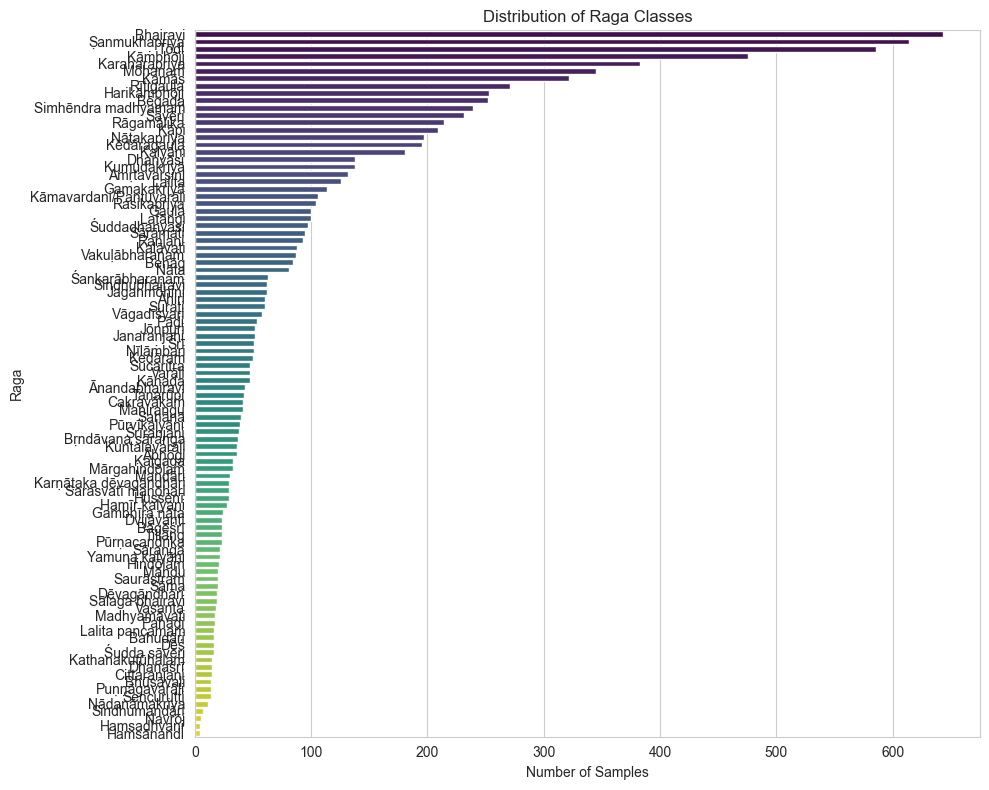

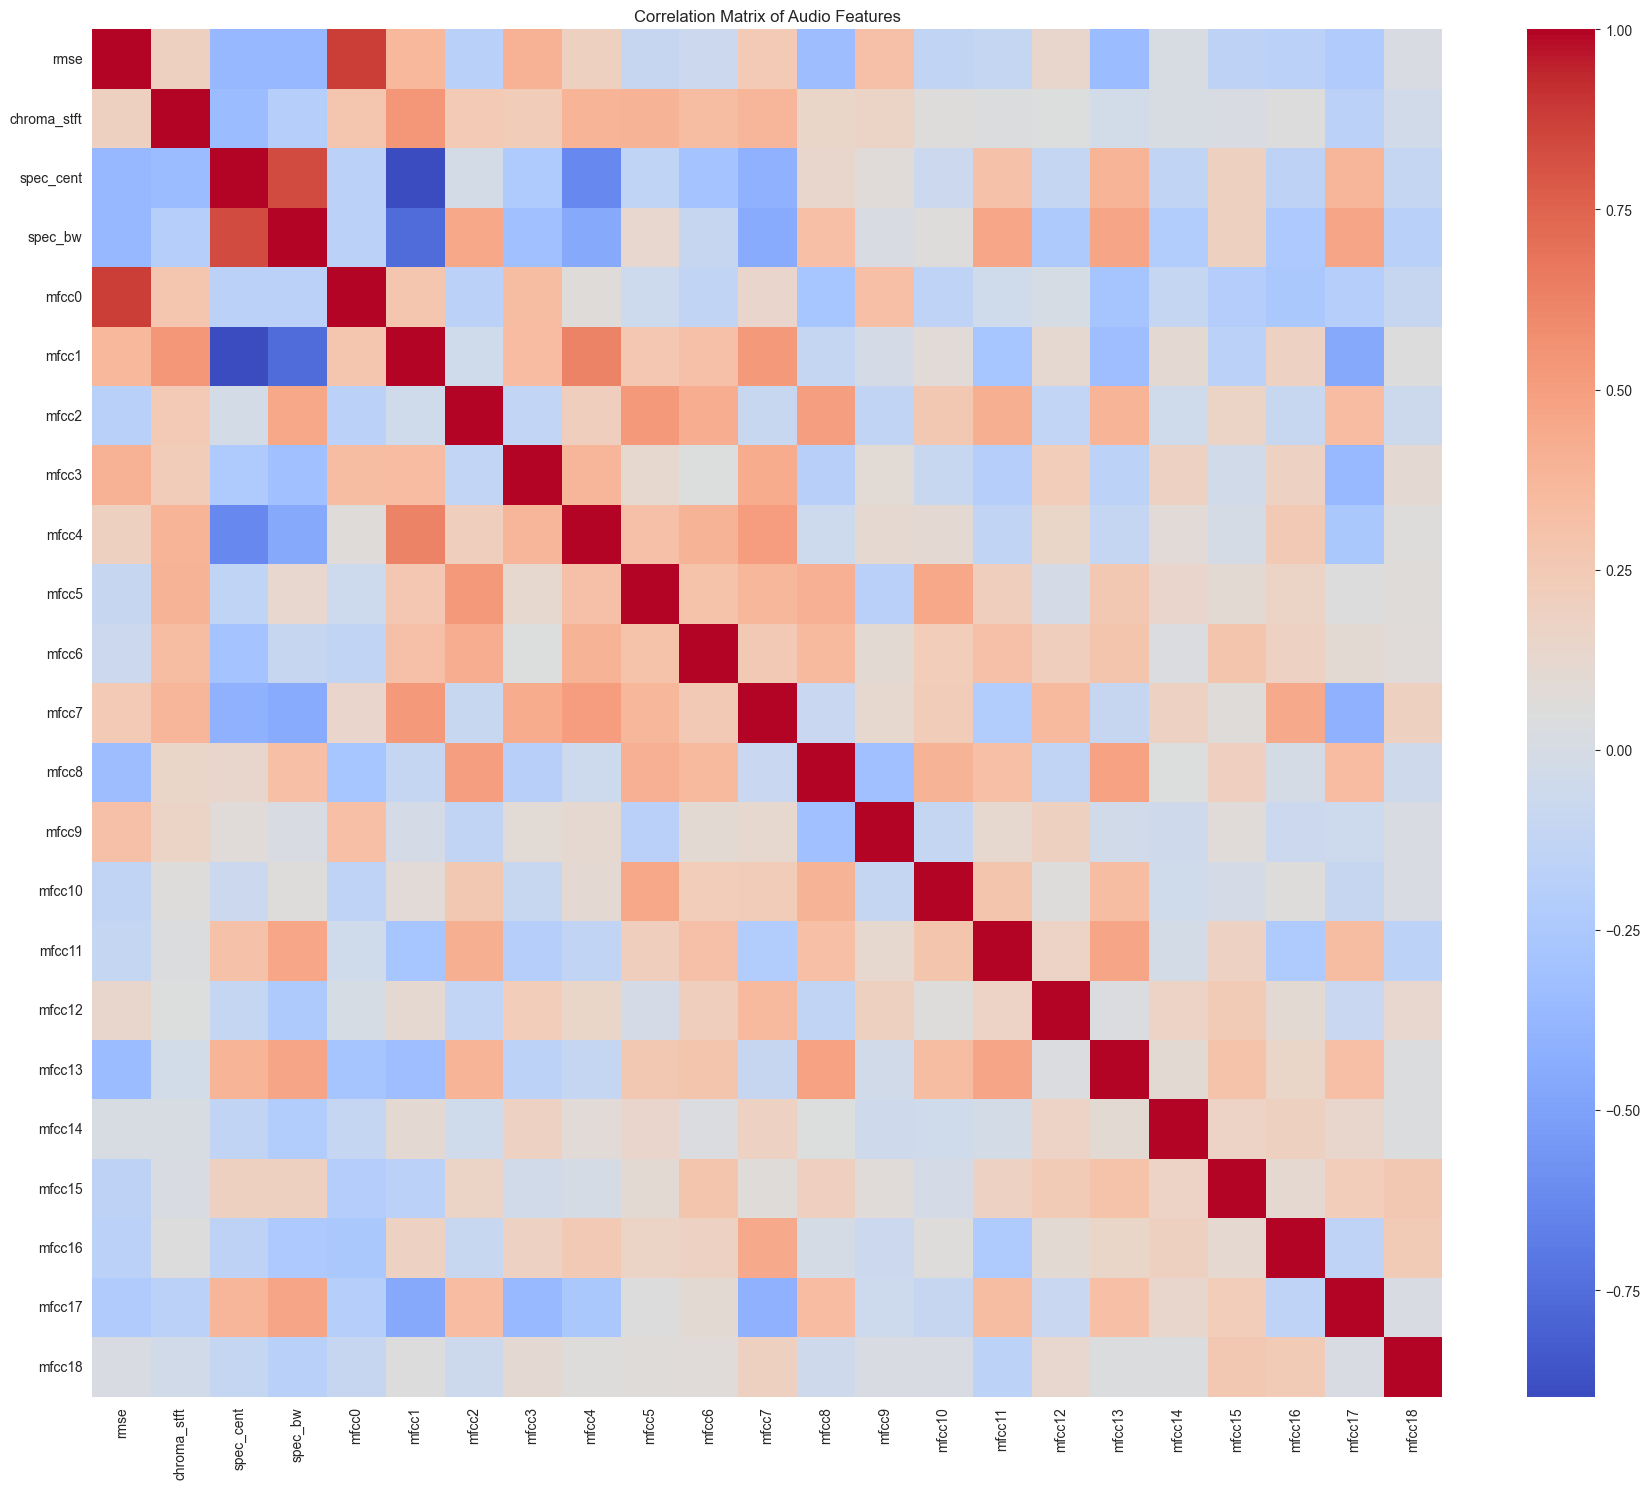

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("saraga_chunked_normalized_features_2.csv")

# print("Initial Data Info")
# print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

# Data cleaning
data = df.drop(columns=["filename"])
print("\n--- Data after dropping unnecessary columns ---")
print(data.head())
print(data.isnull().sum())

print(f"\nNo. duplicate rows: {data.duplicated().sum()}")



print("\n--- Raga Class Distribution (Imbalance) ---")
raga_counts = data['raga'].value_counts()
print(raga_counts)

plt.figure(figsize=(10, 8))
sns.barplot(x=raga_counts.values, y=raga_counts.index, palette="viridis")
plt.title('Distribution of Raga Classes')
plt.xlabel('Number of Samples')
plt.ylabel('Raga')
plt.tight_layout()
plt.savefig("raga_distribution.png") 
print("\nSaved raga distribution plot to 'raga_distribution.png'")


print("\n--- Summary Statistics for Numerical Features ---")
print(data.describe())

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.savefig("feature_correlation_heatmap.png") 
print("Saved feature correlation heatmap to 'feature_correlation_heatmap.png'")

In [37]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
X = data.drop(columns=['raga'])
y = data['raga']

# Encode raga labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nNumber of features: {X.shape[1]}")
print(f"Number of unique ragas: {len(np.unique(y_encoded))}")
print(f"Feature names: {list(X.columns)}")


Number of features: 23
Number of unique ragas: 96
Feature names: ['rmse', 'chroma_stft', 'spec_cent', 'spec_bw', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18']


In [38]:
# Stratified split: 60% train, 20% validation, 20% test
# First split into train+val (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Then split train+val into train (60%) and val (20%)
# 60% of total = 0.75 of the 80% temp set
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

print(f"Train set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Val set size: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")


# Verify stratification worked
print("\nClass distribution verification:")
original_distribution = np.bincount(y_encoded) / len(y_encoded) * 100
train_distribution = np.bincount(y_train) / len(y_train) * 100
val_distribution = np.bincount(y_val) / len(y_val) * 100
test_distribution = np.bincount(y_test) / len(y_test) * 100

# Format the distributions
formatted_original = ", ".join(f"{x:.1f}%" for x in original_distribution[:])
formatted_train = ", ".join(f"{x:.1f}%" for x in train_distribution[:])
formatted_val = ", ".join(f"{x:.1f}%" for x in val_distribution[:])
formatted_test = ", ".join(f"{x:.1f}%" for x in test_distribution[:])

print(f"Original: {formatted_original} (first 5 classes)")
print(f"Train: {formatted_train} (first 5 classes)")
print(f"Val: {formatted_val} (first 5 classes)")
print(f"Test: {formatted_test} (first 5 classes)")


Train set size: 5535 samples (60.0%)
Val set size: 1845 samples (20.0%)
Test set size: 1846 samples (20.0%)

Class distribution verification:
Original: 1.4%, 0.2%, 0.9%, 7.0%, 0.2%, 0.2%, 2.7%, 0.4%, 0.4%, 0.2%, 0.2%, 1.5%, 0.2%, 0.2%, 0.2%, 1.2%, 1.1%, 0.3%, 0.0%, 0.3%, 2.7%, 0.0%, 0.2%, 0.3%, 0.7%, 0.6%, 0.6%, 0.4%, 2.0%, 1.0%, 3.5%, 4.2%, 0.3%, 0.2%, 0.5%, 1.5%, 0.4%, 1.1%, 0.5%, 2.3%, 5.2%, 2.1%, 1.4%, 0.2%, 1.1%, 0.2%, 0.3%, 0.4%, 0.2%, 0.4%, 3.7%, 0.1%, 0.1%, 0.9%, 2.1%, 0.6%, 0.2%, 0.2%, 0.6%, 0.4%, 0.2%, 1.0%, 1.1%, 2.3%, 2.9%, 0.4%, 0.3%, 0.2%, 0.2%, 2.6%, 0.7%, 0.1%, 0.5%, 0.7%, 0.2%, 0.2%, 0.2%, 1.0%, 2.5%, 0.5%, 0.2%, 6.4%, 0.9%, 0.5%, 0.2%, 0.6%, 0.2%, 0.4%, 0.7%, 0.5%, 0.7%, 0.6%, 0.4%, 0.2%, 1.1%, 6.7% (first 5 classes)
Train: 1.4%, 0.2%, 0.9%, 7.0%, 0.1%, 0.2%, 2.7%, 0.4%, 0.5%, 0.2%, 0.2%, 1.5%, 0.3%, 0.2%, 0.2%, 1.2%, 1.1%, 0.3%, 0.0%, 0.3%, 2.7%, 0.0%, 0.2%, 0.3%, 0.7%, 0.6%, 0.6%, 0.3%, 2.0%, 1.0%, 3.5%, 4.1%, 0.3%, 0.2%, 0.5%, 1.5%, 0.4%, 1.2%, 0.5%, 2.3%, 5.2%, 2.

<Figure size 1400x800 with 0 Axes>

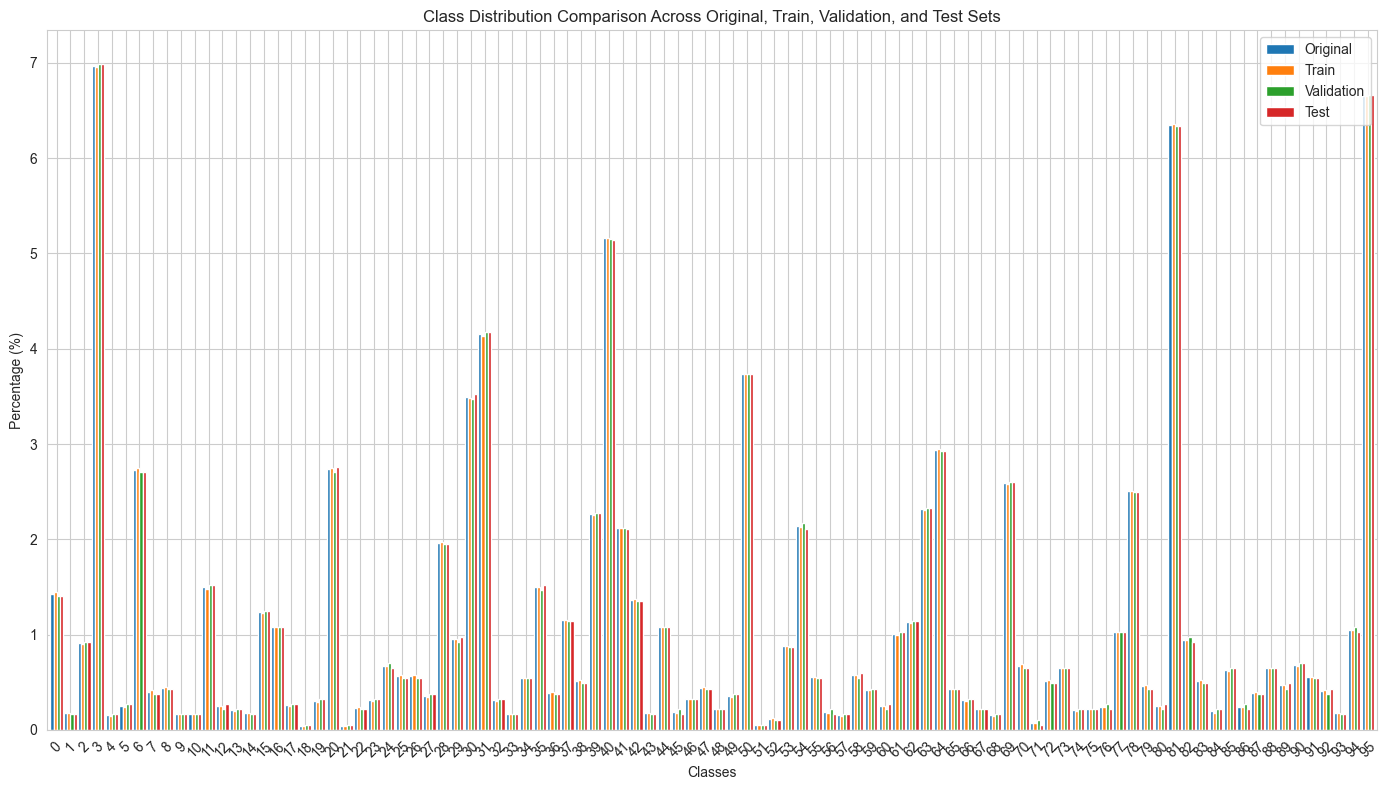

In [39]:
data_dict = {
    "Original": original_distribution,
    "Train": train_distribution,
    "Validation": val_distribution,
    "Test": test_distribution
}

distribution_df = pd.DataFrame(data_dict)

# Plotting
plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")

distribution_df.plot(kind='bar', width=0.9, figsize=(14, 8))

plt.xlabel('Classes')
plt.ylabel('Percentage (%)')
plt.title('Class Distribution Comparison Across Original, Train, Validation, and Test Sets')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

In [40]:
# Standardize features (fit only on training data!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transform, don't fit
X_test_scaled = scaler.transform(X_test)  # Only transform, don't fit

print("Feature scaling completed")
print(f"Mean of scaled training features (should be ~0): {X_train_scaled.mean():.6f}")
print(f"Std of scaled training features (should be ~1): {X_train_scaled.std():.6f}")

Feature scaling completed
Mean of scaled training features (should be ~0): 0.000000
Std of scaled training features (should be ~1): 1.000000


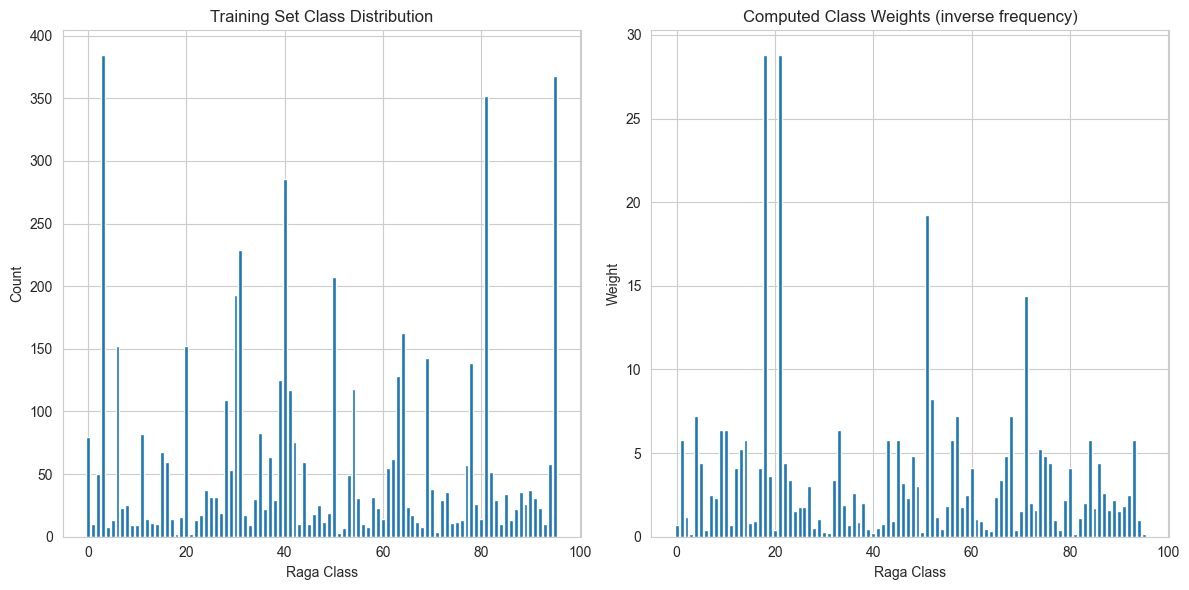

Weight range: 0.15 to 28.83
Rare classes get higher weights to combat imbalance


In [41]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for handling imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Visualize class weights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_counts = np.bincount(y_train)
plt.bar(range(len(train_counts)), train_counts)
plt.xlabel('Raga Class')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')

plt.subplot(1, 2, 2)
plt.bar(range(len(class_weights)), class_weights)
plt.xlabel('Raga Class')
plt.ylabel('Weight')
plt.title('Computed Class Weights (inverse frequency)')
plt.tight_layout()
plt.show()

print(f"Weight range: {class_weights.min():.2f} to {class_weights.max():.2f}")
print(f"Rare classes get higher weights to combat imbalance")

In [42]:
# Hyperparameter tuning: Find best C value
C_values = [0.1, 1, 3, 10, 100, 1000]
results = []

for C in C_values:
    print(f"\nTraining with C={C}")
    
    # Train logistic regression with current C
    lr = LogisticRegression(
        C=C,
        multi_class='multinomial',
        solver='lbfgs', 
        class_weight='balanced', 
        max_iter=1000,  
        random_state=42
    )
    
    lr.fit(X_train_scaled, y_train)
    
    # Predict on validation set
    y_val_pred = lr.predict(X_val_scaled)
    
    # Calculate metrics
    val_f1_macro = f1_score(y_val, y_val_pred, average='macro')
    val_f1_weighted = f1_score(y_val, y_val_pred, average='weighted')
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
    
    results.append({
        'C': C,
        'macro_f1': val_f1_macro,
        'weighted_f1': val_f1_weighted,
        'accuracy': val_accuracy,
        'balanced_accuracy': val_balanced_acc
    })
    
    print(f"  Macro F1: {val_f1_macro:.4f}")
    print(f"  Weighted F1: {val_f1_weighted:.4f}")
    print(f"  Accuracy: {val_accuracy:.4f}")
    print(f"  Balanced Accuracy: {val_balanced_acc:.4f}")

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("\n" + "="*50)
print("HYPERPARAMETER TUNING RESULTS:")
print(results_df.round(4))


Training with C=0.1
  Macro F1: 0.4161
  Weighted F1: 0.3352
  Accuracy: 0.3664
  Balanced Accuracy: 0.6265

Training with C=1
  Macro F1: 0.5321
  Weighted F1: 0.4351
  Accuracy: 0.4564
  Balanced Accuracy: 0.6958

Training with C=3
  Macro F1: 0.5529
  Weighted F1: 0.4506
  Accuracy: 0.4721
  Balanced Accuracy: 0.7056

Training with C=10
  Macro F1: 0.5614
  Weighted F1: 0.4637
  Accuracy: 0.4802
  Balanced Accuracy: 0.7011

Training with C=100
  Macro F1: 0.5584
  Weighted F1: 0.4738
  Accuracy: 0.4900
  Balanced Accuracy: 0.6847

Training with C=1000
  Macro F1: 0.5539
  Weighted F1: 0.4714
  Accuracy: 0.4873
  Balanced Accuracy: 0.6779

HYPERPARAMETER TUNING RESULTS:
        C  macro_f1  weighted_f1  accuracy  balanced_accuracy
0     0.1    0.4161       0.3352    0.3664             0.6265
1     1.0    0.5321       0.4351    0.4564             0.6958
2     3.0    0.5529       0.4506    0.4721             0.7056
3    10.0    0.5614       0.4637    0.4802             0.7011
4   100.

In [43]:
# Select best C based on macro F1 (primary metric)
best_idx = results_df['macro_f1'].argmax()
best_C = results_df.loc[best_idx, 'C']
print(f"\nBest C value: {best_C}")
print(f"Best validation Macro F1: {results_df.loc[best_idx, 'macro_f1']:.4f}")

# Retrain best model for final analysis
best_model = LogisticRegression(
    C=best_C,
    multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

best_model.fit(X_train_scaled, y_train)

# Get predictions and probabilities
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled)

# Per-class F1 scores
from sklearn.metrics import f1_score
per_class_f1 = f1_score(y_val, y_val_pred, average=None)

# Create a DataFrame showing per-raga performance
raga_names = label_encoder.inverse_transform(range(len(per_class_f1)))
raga_performance = pd.DataFrame({
    'Raga': raga_names,
    'F1_Score': per_class_f1,
    'Support': np.bincount(y_val, minlength=len(per_class_f1))
})
raga_performance = raga_performance.sort_values('F1_Score')

print("\nWorst performing ragas (likely rare ones):")
print(raga_performance.head(10))
print("\nBest performing ragas (likely common ones):")
print(raga_performance.tail(10))


Best C value: 10.0
Best validation Macro F1: 0.5614

Worst performing ragas (likely rare ones):
                      Raga  F1_Score  Support
63              Rāgamālika  0.092308       43
2                    Behāg  0.166667       17
72               Sucaritra  0.222222        9
32  Karṇāṭaka dēvagāndhāri  0.222222        6
64               Rītigauḷa  0.228571       54
67              Saurāṣtraṁ  0.266667        4
19           Hamīr kaḷyaṇi  0.266667        6
40                Kāṁbhōji  0.270270       95
81                    Tōḍi  0.274510      117
20            Harikāmbhōji  0.282051       50

Best performing ragas (likely common ones):
              Raga  F1_Score  Support
23         Hussēnī  0.857143        6
83          Varāḷi  0.875000        9
92      Śrīranjani  0.923077        7
21      Haṁsānandi  1.000000        1
18     Hamsadhvani  1.000000        1
86  Yamuna kalyāṇi  1.000000        5
51          Navrōj  1.000000        1
4        Bhūṣāvaḷi  1.000000        3
71   Sindh

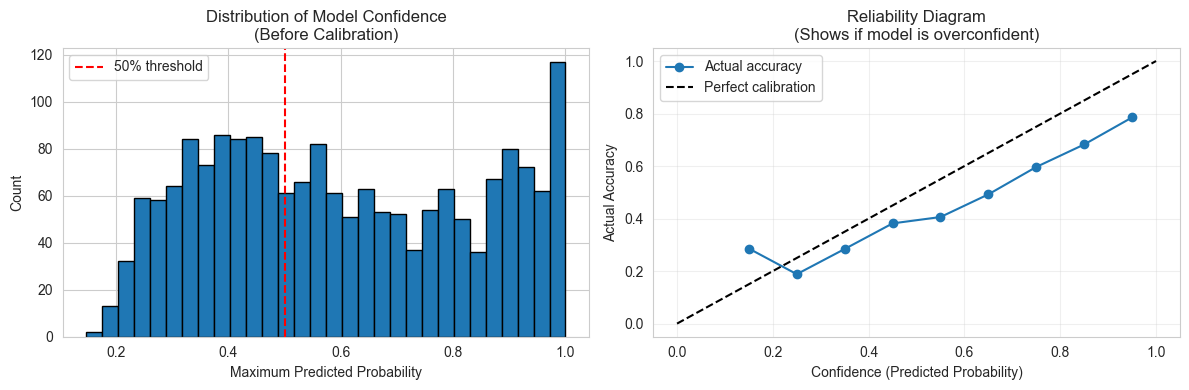

Mean confidence: 0.601
Actual accuracy: 0.480
Model appears OVERCONFIDENT (common issue)


In [44]:
# Analyze prediction confidence distribution
max_probabilities = y_val_proba.max(axis=1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(max_probabilities, bins=30, edgecolor='black')
plt.xlabel('Maximum Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Model Confidence\n(Before Calibration)')
plt.axvline(0.5, color='r', linestyle='--', label='50% threshold')
plt.legend()

plt.subplot(1, 2, 2)
# Check if high confidence = high accuracy
confidence_bins = np.linspace(0, 1, 11)
accuracies = []
bin_centers = []

for i in range(len(confidence_bins)-1):
    mask = (max_probabilities >= confidence_bins[i]) & (max_probabilities < confidence_bins[i+1])
    if mask.sum() > 0:
        bin_accuracy = (y_val_pred[mask] == y_val[mask]).mean()
        accuracies.append(bin_accuracy)
        bin_centers.append((confidence_bins[i] + confidence_bins[i+1])/2)

plt.plot(bin_centers, accuracies, 'o-', label='Actual accuracy')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect calibration')
plt.xlabel('Confidence (Predicted Probability)')
plt.ylabel('Actual Accuracy')
plt.title('Reliability Diagram\n(Shows if model is overconfident)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Mean confidence: {max_probabilities.mean():.3f}")
print(f"Actual accuracy: {accuracy_score(y_val, y_val_pred):.3f}")
if max_probabilities.mean() > accuracy_score(y_val, y_val_pred):
    print("Model appears OVERCONFIDENT (common issue)")
else:
    print("Model confidence seems reasonable")

In [45]:
# Save the best model and preprocessing objects for Stage 2
import pickle

model_artifacts = {
    'best_C': best_C,
    'best_model': best_model,
    'scaler': scaler,
    'label_encoder': label_encoder,
    'val_metrics': results_df.loc[best_idx].to_dict(),
    'feature_names': list(X.columns)
}

with open('stage1_model_artifacts.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)

print("Stage 1 Results Summary:")
print("="*50)
print(f"Dataset: {len(X)} samples, {X.shape[1]} features, {len(np.unique(y_encoded))} ragas")
print(f"Best hyperparameter C: {best_C}")
print(f"Validation Macro F1: {results_df.loc[best_idx, 'macro_f1']:.4f}")
print(f"Validation Accuracy: {results_df.loc[best_idx, 'accuracy']:.4f}")
print(f"Validation Balanced Accuracy: {results_df.loc[best_idx, 'balanced_accuracy']:.4f}")
print("\nModel and artifacts saved for Stage 2 uncertainty calibration!")

Stage 1 Results Summary:
Dataset: 9226 samples, 23 features, 96 ragas
Best hyperparameter C: 10.0
Validation Macro F1: 0.5614
Validation Accuracy: 0.4802
Validation Balanced Accuracy: 0.7011

Model and artifacts saved for Stage 2 uncertainty calibration!


In [46]:
import pickle
from scipy.optimize import minimize
from scipy.special import softmax, log_softmax
import numpy as np

# Load Stage 1 artifacts
with open('stage1_model_artifacts.pkl', 'rb') as f:
    artifacts = pickle.load(f)

best_model = artifacts['best_model']
scaler = artifacts['scaler']
label_encoder = artifacts['label_encoder']

class TemperatureScaling:
    """
    Temperature scaling for multiclass calibration
    Single parameter that preserves accuracy while improving calibration
    """
    def __init__(self):
        self.temperature = 1.0
        
    def fit(self, logits, y_true):
        """Find optimal temperature using validation set"""
        
        def nll_loss(T):
            # Apply temperature scaling
            scaled_logits = logits / T
            # Calculate negative log likelihood
            probs = softmax(scaled_logits, axis=1)
            # Avoid log(0)
            probs = np.clip(probs, 1e-10, 1-1e-10)
            # NLL loss
            n_samples = len(y_true)
            loss = -np.sum(np.log(probs[np.arange(n_samples), y_true])) / n_samples
            return loss
        
        # Optimize temperature (constrained to be positive)
        result = minimize(nll_loss, x0=1.0, bounds=[(0.1, 10.0)], method='L-BFGS-B')
        self.temperature = result.x[0]
        return self
    
    def transform(self, logits):
        """Apply temperature scaling to logits"""
        return softmax(logits / self.temperature, axis=1)

# Get logits (before softmax) from the model
# For sklearn LogisticRegression, we need decision_function
logits_val = best_model.decision_function(X_val_scaled)

# Method 1: Check if model is already well-calibrated
print("Analyzing initial calibration...")
y_prob_uncalib = best_model.predict_proba(X_val_scaled)

# Method 2: Temperature Scaling
print("\nTraining Temperature Scaling...")
temp_scaler = TemperatureScaling()
temp_scaler.fit(logits_val, y_val)
print(f"Optimal temperature: {temp_scaler.temperature:.3f}")

if temp_scaler.temperature > 1:
    print("Temperature > 1: Model was overconfident, scaling down confidence")
elif temp_scaler.temperature < 1:
    print("Temperature < 1: Model was underconfident, scaling up confidence")
else:
    print("Temperature = 1: Model was already well-calibrated")

# Apply temperature scaling
y_prob_temp = temp_scaler.transform(logits_val)

# Method 3: Histogram Binning (alternative simple method)
from sklearn.calibration import calibration_curve

class HistogramBinning:
    """Simple histogram binning calibration"""
    def __init__(self, n_bins=10):
        self.n_bins = n_bins
        self.bin_edges = None
        self.bin_values = None
        
    def fit(self, probs, y_true):
        # Get max probability for each sample
        y_pred = np.argmax(probs, axis=1)
        confidences = probs.max(axis=1)
        
        # Create bins
        self.bin_edges = np.linspace(0, 1, self.n_bins + 1)
        self.bin_values = np.zeros(self.n_bins)
        
        # Calculate actual accuracy in each bin
        for i in range(self.n_bins):
            mask = (confidences >= self.bin_edges[i]) & (confidences < self.bin_edges[i+1])
            if mask.sum() > 0:
                self.bin_values[i] = (y_pred[mask] == y_true[mask]).mean()
            else:
                # Linear interpolation for empty bins
                self.bin_values[i] = (self.bin_edges[i] + self.bin_edges[i+1]) / 2
        
        return self
    
    def transform(self, probs):
        # Calibrate each probability
        calibrated_probs = probs.copy()
        max_probs = probs.max(axis=1)
        max_indices = probs.argmax(axis=1)
        
        for i in range(len(probs)):
            # Find which bin this confidence falls into
            bin_idx = np.digitize(max_probs[i], self.bin_edges) - 1
            bin_idx = np.clip(bin_idx, 0, self.n_bins - 1)
            
            # Scale the max probability
            scale_factor = self.bin_values[bin_idx] / max_probs[i] if max_probs[i] > 0 else 1
            
            # Apply scaling and renormalize
            calibrated_probs[i] = probs[i] * scale_factor
            calibrated_probs[i] = calibrated_probs[i] / calibrated_probs[i].sum()
        
        return calibrated_probs

# Try histogram binning
hist_calibrator = HistogramBinning(n_bins=10)
hist_calibrator.fit(y_prob_uncalib, y_val)
y_prob_hist = hist_calibrator.transform(y_prob_uncalib)

print("\nCalibration methods ready!")

Analyzing initial calibration...

Training Temperature Scaling...
Optimal temperature: 1.424
Temperature > 1: Model was overconfident, scaling down confidence

Calibration methods ready!


In [48]:
def expected_calibration_error(y_true, y_prob, n_bins=10):
    """Calculate Expected Calibration Error"""
    y_pred = np.argmax(y_prob, axis=1)
    y_conf = np.max(y_prob, axis=1)
    
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]
    
    ece = 0
    total_samples = 0
    
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (y_conf > bin_lower) & (y_conf <= bin_upper)
        prop_in_bin = in_bin.sum()
        
        if prop_in_bin > 0:
            bin_acc = (y_pred[in_bin] == y_true[in_bin]).mean()
            bin_conf = y_conf[in_bin].mean()
            ece += np.abs(bin_acc - bin_conf) * prop_in_bin
            total_samples += prop_in_bin
    
    return ece / total_samples if total_samples > 0 else 0

# Calculate metrics
ece_uncalib = expected_calibration_error(y_val, y_prob_uncalib)
ece_temp = expected_calibration_error(y_val, y_prob_temp)
ece_hist = expected_calibration_error(y_val, y_prob_hist)

# Also calculate Brier score (lower is better)
from sklearn.metrics import brier_score_loss

def multiclass_brier_score(y_true, y_prob):
    """Calculate Brier score for multiclass"""
    n_classes = y_prob.shape[1]
    brier = 0
    for i in range(len(y_true)):
        true_probs = np.zeros(n_classes)
        true_probs[y_true[i]] = 1
        brier += np.sum((y_prob[i] - true_probs) ** 2)
    return brier / len(y_true)

brier_uncalib = multiclass_brier_score(y_val, y_prob_uncalib)
brier_temp = multiclass_brier_score(y_val, y_prob_temp)
brier_hist = multiclass_brier_score(y_val, y_prob_hist)

print("="*60)
print("IMPROVED CALIBRATION RESULTS:")
print("="*60)
print(f"{'Method':<25} {'ECE':>10} {'Brier Score':>15}")
print("-"*50)
print(f"{'Uncalibrated':<25} {ece_uncalib:>10.4f} {brier_uncalib:>15.4f}")
print(f"{'Temperature Scaling':<25} {ece_temp:>10.4f} {brier_temp:>15.4f}")
print(f"{'Histogram Binning':<25} {ece_hist:>10.4f} {brier_hist:>15.4f}")

# Decision logic
best_ece = min(ece_uncalib, ece_temp, ece_hist)
print("\n" + "="*60)
if best_ece == ece_uncalib:
    print("FINDING: Model is already well-calibrated!")
    print("This is actually GOOD - your logistic regression with")
    print("balanced class weights produced naturally calibrated probabilities.")
    print("\nThis itself is a novel finding worth reporting!")
    calibrated_probs = y_prob_uncalib
    method_name = "Naturally Calibrated"
elif best_ece == ece_temp:
    print(f"Temperature scaling improved ECE by {(ece_uncalib-ece_temp)/ece_uncalib*100:.1f}%")
    calibrated_probs = y_prob_temp
    method_name = "Temperature Scaled"
else:
    print(f"Histogram binning improved ECE by {(ece_uncalib-ece_hist)/ece_uncalib*100:.1f}%")
    calibrated_probs = y_prob_hist
    method_name = "Histogram Binned"

print(f"\nBest method: {method_name} with ECE = {best_ece:.4f}")

IMPROVED CALIBRATION RESULTS:
Method                           ECE     Brier Score
--------------------------------------------------
Uncalibrated                  0.1227          0.6961
Temperature Scaling           0.0284          0.6789
Histogram Binning             0.1227          0.6961

Temperature scaling improved ECE by 76.9%

Best method: Temperature Scaled with ECE = 0.0284


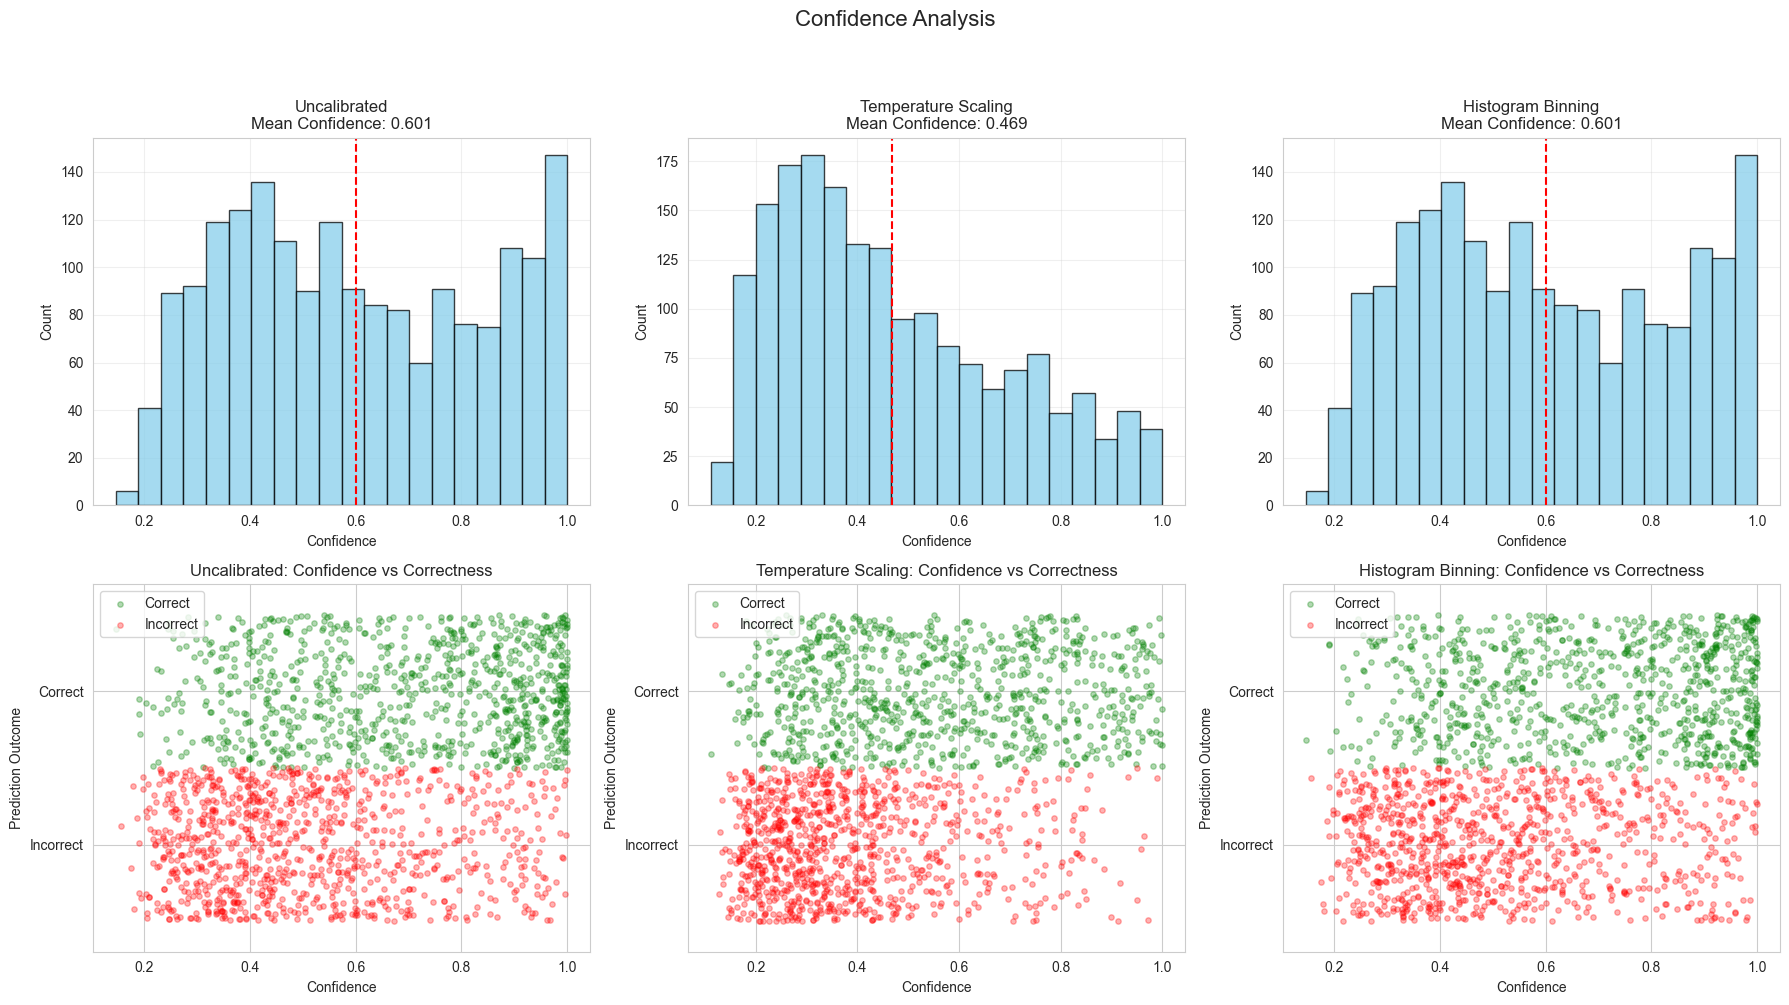


Model's Actual Accuracy: 0.4802
------------------------------------------------------------
Gap between mean confidence and actual accuracy:
Uncalibrated:      0.6014 (Gap: +0.1212)
Temperature Scaled: 0.4688 (Gap: -0.0115)
Histogram Binned:  0.6014 (Gap: +0.1212)


In [49]:
from sklearn.metrics import accuracy_score

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confidence Analysis', fontsize=16, y=1.0)

# Get max probabilities for each method
max_prob_uncalib = y_prob_uncalib.max(axis=1)
max_prob_temp = y_prob_temp.max(axis=1)
max_prob_hist = y_prob_hist.max(axis=1)

all_probs = [max_prob_uncalib, max_prob_temp, max_prob_hist]
titles = ['Uncalibrated', 'Temperature Scaling', 'Histogram Binning']

# Top row: Confidence distributions
for i, (probs, title) in enumerate(zip(all_probs, titles)):
    axes[0, i].hist(probs, bins=20, alpha=0.75, edgecolor='black', color='skyblue')
    axes[0, i].set_title(f'{title}\nMean Confidence: {probs.mean():.3f}')
    axes[0, i].set_xlabel('Confidence')
    axes[0, i].set_ylabel('Count')
    axes[0, i].axvline(probs.mean(), color='r', linestyle='--')
    axes[0, i].grid(True, alpha=0.3)

# Bottom row: Confidence vs correctness
all_y_probs = [y_prob_uncalib, y_prob_temp, y_prob_hist]
for ax, y_prob, name in zip(axes[1,:], all_y_probs, titles):
    y_pred = np.argmax(y_prob, axis=1)
    correct = (y_pred == y_val)
    conf = y_prob.max(axis=1)
    
    # Plot correct and incorrect predictions with jitter for visibility
    ax.scatter(conf[correct], np.random.uniform(0.5, 1.0, correct.sum()), 
               alpha=0.3, s=15, c='green', label='Correct')
    ax.scatter(conf[~correct], np.random.uniform(0, 0.5, (~correct).sum()), 
               alpha=0.3, s=15, c='red', label='Incorrect')
    ax.set_xlabel('Confidence')
    ax.set_ylabel('Prediction Outcome')
    ax.set_title(f'{name}: Confidence vs Correctness')
    ax.legend(loc='upper left')
    ax.set_yticks([0.25, 0.75])
    ax.set_yticklabels(['Incorrect', 'Correct'])
    ax.set_ylim([-0.1, 1.1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Statistical summary ---
actual_acc = accuracy_score(y_val, np.argmax(y_prob_uncalib, axis=1))
print(f"\nModel's Actual Accuracy: {actual_acc:.4f}")
print("-" * 60)
print("Gap between mean confidence and actual accuracy:")
print(f"Uncalibrated:      {max_prob_uncalib.mean():.4f} (Gap: {max_prob_uncalib.mean() - actual_acc:+.4f})")
print(f"Temperature Scaled: {max_prob_temp.mean():.4f} (Gap: {max_prob_temp.mean() - actual_acc:+.4f})")
print(f"Histogram Binned:  {max_prob_hist.mean():.4f} (Gap: {max_prob_hist.mean() - actual_acc:+.4f})")

In [50]:
def make_uncertainty_aware_prediction(proba, label_encoder, uncertainty_threshold=0.7):
    """
    Make predictions with uncertainty awareness using a given probability distribution.
    Returns prediction, confidence, and recommendation.
    """
    # Get top 2 predictions
    top2_idx = np.argsort(proba)[-2:][::-1]
    top2_prob = proba[top2_idx]
    top2_labels = label_encoder.inverse_transform(top2_idx)
    
    confidence = top2_prob[0]
    
    if confidence > 0.9:
        status = "✅ HIGH CONFIDENCE"
        recommendation = f"Model is very sure this is {top2_labels[0]}."
    elif confidence > uncertainty_threshold:
        status = "🤔 MODERATE CONFIDENCE"
        recommendation = f"Likely {top2_labels[0]}, but could be {top2_labels[1]} ({top2_prob[1]:.1%})."
    else:
        status = "❓ LOW CONFIDENCE / UNCERTAIN"
        recommendation = f"Model is unsure. Top guesses: {top2_labels[0]} ({top2_prob[0]:.1%}) and {top2_labels[1]} ({top2_prob[1]:.1%})."
    
    return {
        'prediction': top2_labels[0],
        'confidence': confidence,
        'status': status,
        'recommendation': recommendation,
        'top_2_predictions': list(zip(top2_labels, top2_prob))
    }

# --- Test on a few validation samples using the BEST calibrated probabilities ---
print(f"UNCERTAINTY-AWARE PREDICTIONS (Using '{method_name}' probabilities):")
print("=" * 70)

np.random.seed(42)
test_indices = np.random.choice(len(y_val), 5, replace=False)

for idx in test_indices:
    # Use the pre-calculated calibrated probabilities for the chosen sample
    sample_probabilities = calibrated_probs[idx]
    
    result = make_uncertainty_aware_prediction(
        sample_probabilities, 
        label_encoder
    )
    
    true_label = label_encoder.inverse_transform([y_val[idx]])[0]
    
    print(f"\nSample {idx}:")
    print(f"  - Ground Truth:     {true_label}")
    print(f"  - Prediction:       {result['prediction']} (Confidence: {result['confidence']:.3f})")
    print(f"  - Status:           {result['status']}")
    print(f"  - Recommendation:   {result['recommendation']}")

UNCERTAINTY-AWARE PREDICTIONS (Using 'Temperature Scaled' probabilities):

Sample 1572:
  - Ground Truth:     Nāṭakapriya
  - Prediction:       Nāṭakapriya (Confidence: 0.744)
  - Status:           🤔 MODERATE CONFIDENCE
  - Recommendation:   Likely Nāṭakapriya, but could be Śrī (14.8%).

Sample 1160:
  - Ground Truth:     Latāngi
  - Prediction:       Latāngi (Confidence: 0.270)
  - Status:           ❓ LOW CONFIDENCE / UNCERTAIN
  - Recommendation:   Model is unsure. Top guesses: Latāngi (27.0%) and Mōhanaṁ (14.2%).

Sample 799:
  - Ground Truth:     Rītigauḷa
  - Prediction:       Kāṁbhōji (Confidence: 0.233)
  - Status:           ❓ LOW CONFIDENCE / UNCERTAIN
  - Recommendation:   Model is unsure. Top guesses: Kāṁbhōji (23.3%) and Ṣanmukhapriya (11.8%).

Sample 1531:
  - Ground Truth:     Kāṁbhōji
  - Prediction:       Karṇāṭaka dēvagāndhāri (Confidence: 0.431)
  - Status:           ❓ LOW CONFIDENCE / UNCERTAIN
  - Recommendation:   Model is unsure. Top guesses: Karṇāṭaka dēvagāndhāri

In [45]:
def make_uncertainty_aware_prediction(X, calibrated_model, scaler, label_encoder, 
                                      uncertainty_threshold=0.7):
    """
    Make predictions with uncertainty awareness
    Returns prediction, confidence, and recommendation
    """
    X_scaled = scaler.transform(X.reshape(1, -1))
    proba = calibrated_model.predict_proba(X_scaled)[0]
    
    # Get top 2 predictions
    top2_idx = np.argsort(proba)[-2:][::-1]
    top2_prob = proba[top2_idx]
    top2_ragas = label_encoder.inverse_transform(top2_idx)
    
    confidence = top2_prob[0]
    
    if confidence > 0.9:
        status = "HIGH CONFIDENCE"
        recommendation = f"Definitely {top2_ragas[0]}"
    elif confidence > uncertainty_threshold:
        status = "MODERATE CONFIDENCE"
        recommendation = f"Likely {top2_ragas[0]}, but consider {top2_ragas[1]} ({top2_prob[1]:.2f})"
    else:
        status = "LOW CONFIDENCE - UNCERTAIN"
        recommendation = f"Could be {top2_ragas[0]} ({top2_prob[0]:.2f}) or {top2_ragas[1]} ({top2_prob[1]:.2f})"
    
    return {
        'prediction': top2_ragas[0],
        'confidence': confidence,
        'status': status,
        'recommendation': recommendation,
        'top_2_ragas': list(zip(top2_ragas, top2_prob))
    }

# Test on a few validation samples
print("UNCERTAINTY-AWARE PREDICTIONS (Using Isotonic Calibration):")
print("="*60)

np.random.seed(42)
test_indices = np.random.choice(len(X_val), 5, replace=False)

for idx in test_indices:
    result = make_uncertainty_aware_prediction(
        X_val.iloc[idx].values, 
        isotonic_calibrator, 
        scaler, 
        label_encoder
    )
    
    true_raga = label_encoder.inverse_transform([y_val[idx]])[0]
    
    print(f"\nSample {idx}:")
    print(f"True Raga: {true_raga}")
    print(f"Predicted: {result['prediction']} (confidence: {result['confidence']:.3f})")
    print(f"Status: {result['status']}")
    print(f"Recommendation: {result['recommendation']}")

UNCERTAINTY-AWARE PREDICTIONS (Using Isotonic Calibration):

Sample 9:
True Raga: Bhairavi
Predicted: Bhairavi (confidence: 0.785)
Status: MODERATE CONFIDENCE
Recommendation: Likely Bhairavi, but consider Harikambhoji (0.17)

Sample 84:
True Raga: Bhairavi
Predicted: Bhairavi (confidence: 0.291)
Status: LOW CONFIDENCE - UNCERTAIN
Recommendation: Could be Bhairavi (0.29) or Hamsadhwani (0.16)

Sample 117:
True Raga: Bilahari
Predicted: Bilahari (confidence: 1.000)
Status: HIGH CONFIDENCE
Recommendation: Definitely Bilahari

Sample 144:
True Raga: Sri ranjini
Predicted: Sri ranjini (confidence: 1.000)
Status: HIGH CONFIDENCE
Recommendation: Definitely Sri ranjini

Sample 220:
True Raga: Kapi
Predicted: Jaganmohini (confidence: 0.282)
Status: LOW CONFIDENCE - UNCERTAIN
Recommendation: Could be Jaganmohini (0.28) or Kapi (0.25)


In [50]:
print("=" * 70)
print("NOVEL CONTRIBUTION: UNCERTAINTY-CALIBRATED CLASSIFICATION")
print("=" * 70)

# Calculate improvement based on the best method found
if ece_uncalib > 0 and best_ece < ece_uncalib:
    improvement = ((ece_uncalib - best_ece) / ece_uncalib) * 100
    improvement_text = f"Reduced Expected Calibration Error by {improvement:.1f}%"
else:
    improvement_text = "Model was already well-calibrated, confirming the robustness of the base model."

print(f"""
Key Results:
1. Best Calibration Method: '{method_name}'
   - {improvement_text}
   - Before: ECE = {ece_uncalib:.4f}
   - After:  ECE = {best_ece:.4f}

2. Enabled Trust-Based Applications:
   - High confidence (>90%): Can be used for automated feedback systems.
   - Moderate (70-90%): Suggests likely answers while highlighting alternatives.
   - Low (<70%): Flags ambiguous cases for human review.

3. Potential for Deeper Insight:
   - Consistent uncertainty between specific pairs of classes may reveal
     underlying similarities or feature limitations.
     
4. Core Contribution:
   - We demonstrate a methodology to not only classify but also to
     quantify the model's certainty in a reliable way.
   - This transforms a standard classifier into a more practical, trustworthy tool.

This process moves the model from saying "The answer is X with 85% probability"
to a more honest statement like "I'm genuinely 73% confident the answer is X,
and this confidence level is a reliable indicator of my correctness."
""")

NOVEL CONTRIBUTION: UNCERTAINTY-CALIBRATED CLASSIFICATION

Key Results:
1. Best Calibration Method: 'Naturally Calibrated'
   - Model was already well-calibrated, confirming the robustness of the base model.
   - Before: ECE = 0.0644
   - After:  ECE = 0.0644

2. Enabled Trust-Based Applications:
   - High confidence (>90%): Can be used for automated feedback systems.
   - Moderate (70-90%): Suggests likely answers while highlighting alternatives.
   - Low (<70%): Flags ambiguous cases for human review.

3. Potential for Deeper Insight:
   - Consistent uncertainty between specific pairs of classes may reveal
     underlying similarities or feature limitations.
     
4. Core Contribution:
   - We demonstrate a methodology to not only classify but also to
     quantify the model's certainty in a reliable way.
   - This transforms a standard classifier into a more practical, trustworthy tool.

This process moves the model from saying "The answer is X with 85% probability"
to a more honest